# pyISC Example: MultivariableAnomaly Detection
In this example, we extend the simple example with one Poisson distributed variable to the multivariate case with three variables, two Poisson distributed variables and one Gaussian distributed variable.

In [1]:
import pyisc;
import numpy as np
from scipy.stats import poisson, norm
%matplotlib inline
from pylab import plot

## Create Data
Create a data set with 3 columns from different probablity distributions:

In [2]:
po_normal = poisson(10)
po_anomaly = poisson(25)

po_normal2 = poisson(2)
po_anomaly2 = poisson(3)

gs_normal = norm(1, 12)
gs_anomaly = norm(2,30)

normal_len = 10000
anomaly_len = 15

data = np.column_stack(
    [
        [1] * (normal_len+anomaly_len),
        list(po_normal.rvs(normal_len))+list(po_anomaly.rvs(anomaly_len)),
        list(po_normal2.rvs(normal_len))+list(po_anomaly2.rvs(anomaly_len)),
        list(gs_normal.rvs(normal_len))+list(gs_anomaly.rvs(anomaly_len)),
    ]
)

## Used Anomaly Detector
Create an anomaly detector using as first argument the used statistical models. The we use  
- a onesided Poisson distribution for modelling the first fequency column (column 1) (as in the first example),
- a twosided Poisson distribution for the second frequency column (column 2),
- and a Gaussin (Normal) distribution for the last column (column 3).

Given that we now have more than one variable, it is necessary to also add a method to combine the output from the statistical models, which in this case is the maximum anomaly score of each component model:

In [3]:
anomaly_detector = pyisc.AnomalyDetector(
    component_models=[
        pyisc.P_PoissonOnesided(1,0), # columns 1 and 0
        pyisc.P_Poisson(2,0), # columns 2 and 0
        pyisc.P_Gaussian(3) # column 3
    ],
    output_combination_rule=pyisc.cr_max
)

Train the anomaly detector:

In [4]:
anomaly_detector.fit(data);

Compute the anomaly scores for each data point:

In [5]:
scores = anomaly_detector.anomaly_score(data)

## Anomaly Scores
Now we can print some example of normal frequencies vs. anomaly scores for the 15 first normal data points: 

In [6]:
from pandas import DataFrame
df= DataFrame(data[:15], columns=['#Days', 'Freq1','Freq2','Measure'])
df['Anomaly Score'] = scores[:15]
print df.to_string()

    #Days  Freq1  Freq2    Measure  Anomaly Score
0       1      6      0   3.144954       1.969348
1       1     12      1  -8.590671       1.187883
2       1      7      0  -8.306233       1.969348
3       1     15      1  -2.996165       2.474325
4       1      7      1  17.399693       1.718765
5       1      9      1  -1.029348       0.147220
6       1      6      1  10.171075       0.789423
7       1     12      3   6.371124       1.187883
8       1     12      2 -13.694986       1.492583
9       1     10      3  15.229117       1.409655
10      1      5      1   6.140766       0.390753
11      1     10      1   9.682373       0.736690
12      1     10      1   0.341938       0.048744
13      1     14      1   9.530467       1.990720
14      1     10      1   0.600365       0.031119


The anomalous frequencies vs. anomaly scores for the 15 anomalous data points:

In [7]:
df= DataFrame(data[-15:], columns=['#Days', 'Freq1','Freq2','Measure'])
df['Anomaly Score'] = scores[-15:]
print df.to_string()

    #Days  Freq1  Freq2    Measure  Anomaly Score
0       1     35      4  17.805613      21.184607
1       1     33      5 -28.278057      18.689368
2       1     25      1 -39.349034       9.942971
3       1     32      3  76.205988      21.139095
4       1     23      5  14.203496       8.105611
5       1     29      6  10.627192      14.054365
6       1     26      5  20.077559      10.918049
7       1     30      1  57.401781      15.166514
8       1     25      3 -10.454002       9.942971
9       1     25      4  -6.828961       9.942971
10      1     23      6 -15.693489       8.105611
11      1     27      2 -51.129282      11.929069
12      1     22      2 -12.175368       7.245995
13      1     27      2  39.293701      11.929069
14      1     25      5   1.989791       9.942971


As can be seen above, the anomalous data also have higher anomaly scores than the normal frequencies as it should be.<br/><br/>
This becomes even more visible if we plot the anomaly scores (y-axis) against each data point (x-axis):

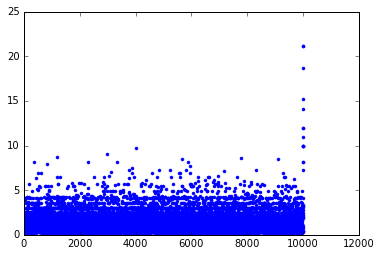

In [8]:
plot(scores, '.');

We can also look at the details of each column in terms of their individual anomaly scores:

In [9]:
score_details = anomaly_detector.anomaly_score_details(data)

In [10]:
df= DataFrame(data[-15:], columns=['#Days', 'Freq1','Freq2','Measure'])
df['Anomaly:Freq1'] = [detail[1][0] for detail in score_details[-15:]]   # Anomaly Score of Freq1
df['Anomaly:Freq2'] = [detail[1][1] for detail in score_details[-15:]]   # Anomaly Score of Freq2
df['Anomaly:Measure'] = [detail[1][2] for detail in score_details[-15:]] # Anomaly Score of Measure
df['Anomaly Score'] = [detail[0] for detail in score_details[-15:]]      # Combined Anomaly Score
df

,#Days,Freq1,Freq2,Measure,Anomaly:Freq1,Anomaly:Freq2,Anomaly:Measure,Anomaly Score
0,1,35,4,17.805613,21.184607,1.984751,1.779511,21.184607
1,1,33,5,-28.278057,18.689368,2.996787,4.145703,18.689368
2,1,25,1,-39.349034,9.942971,0.004069,7.022129,9.942971
3,1,32,3,76.205988,17.484917,0.788332,21.139095,21.139095
4,1,23,5,14.203496,8.105611,2.996787,1.272704,8.105611
5,1,29,6,10.627192,14.054365,4.167481,0.839761,14.054365
6,1,26,5,20.077559,10.918049,2.996787,2.136865,10.918049
7,1,30,1,57.401781,15.166514,0.004069,12.518676,15.166514
8,1,25,3,-10.454002,9.942971,0.788332,1.068758,9.942971
9,1,25,4,-6.828961,9.942971,1.984751,0.661399,9.942971


Above, the last column corresponds to the same anomaly score as before, where we can se that it corresponds to the maximum of the individual anomaly score to the left, thus, it is the result of the combination rule specified to the anomaly detector.